# **OFFICIAL RESULTS**

**# MODEL PERFORMANCE:**

- Architecture: RNN (with LSTM/GRU)

- Kaggle Public Score: 0.80079

- Competition Rank: #272

# **# Project: NLP-Disaster-Tweets-Recurrent Neural Networks**
**GitHub Repository:** [https://github.com/papateacher2021-cmd/NLP-Disaster-Tweets-Recurrent-Neural-Networks] (https://github.com/papateacher2021-cmd/NLP-Disaster-Tweets-Recurrent-Neural-Networks)

## Project Overview
This exercise is an introduction to Natural Language Processing, about text binary classification problem using RNN for predicting which Tweets are about real disasters and which one’s aren’t. The dataset stems from the Kaggle competition Natural Language Processing with Disaster Tweets.

This is just an exercise for peer assessment, as requested by the University of Colorado Boulder under Deep Learning Course Module #4: Deep Learning on Sequential Data.


# **STEP #1 - Brief description of the problem and data**

*Instruction: Briefly describe the challenge problem and NLP. Describe the size, dimension, structure, etc., of the data.*

The aim of this exercise is to build a binary classification model for checking up Tweets reporting actual disasters or may be not...
That's the point. to discrimate which  Tweets are actually real and addressing distress services' action and/or informative attention for further broadcasting.

To do that I have proceed as follows:
**Data Preparation and Exploration:**
- Mounted Google Drive and loaded the train.csv and test.csv datasets.
- Inspected data types and identified missing values in the 'keyword' and 'location' columns.
- Handled missing values by filling them with 'unknown'.
- Identified and removed duplicate 'text' entries from the training data.
- Analyzed and visualized the distribution of tweet text lengths.

**Data Preprocessing for RNNs:**
-Extracted text features (X) and target labels (y) from the training data.
- Performed a stratified 80/20 train-validation split to maintain target distribution.
- Defined and applied a robust text preprocessing function (lowercasing, removing URLs, HTML tags, punctuation, numbers, and multiple spaces).
- Tokenized the preprocessed text data using a Keras Tokenizer and padded the sequences to a uniform length, making them suitable for RNN input.

**Model Development and Evaluation:**
- Simple RNN Model: I built, compiled, trained, and evaluated a basic SimpleRNN model. This model achieved a validation accuracy of 0.7222 with a validation loss of 0.7349, demonstrating initial overfitting tendencies.
- My best model (not really, but initially I thought so) (Bidirectional LSTMs with Dropout): I then created a more complex model incorporating Bidirectional LSTM layers and Dropout (0.2) for enhanced sequence processing and initial regularization. This model yielded a validation accuracy of 0.7595 but exhibited significant overfitting, with its validation loss climbing to 1.6828 and an ROC AUC score of 0.8076.
- 'Overfit Reduced Model' (Increased Dropout and Early Stopping): To directly combat overfitting, I built a new model with increased dropout rates (0.5) and integrated an EarlyStopping callback. This improved model achieved a validation accuracy of 0.7801, a much lower validation loss of 0.4692, and an improved ROC AUC score of 0.8481. This shows that my strategies effectively mitigated overfitting and improved generalization.
- I defined a new neural network model that incorporates the pre-trained GloVe embeddings. The Embedding layer was initialized with the embedding_matrix and set to non-trainable to leverage the learned representations, followed by Bidirectional LSTM, Dropout, and Dense layers similar to the Overfit Reduced Model.

# **STEP #2 - Exploratory Data Analysis (EDA)**

*Instructions: Inspect, Visualize and Clean the Data*

*Instructions: Show a few visualizations like histograms. Describe any data cleaning procedures. Based on your EDA, what is your plan of analysis?*
0.1. Preparing train dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/UniversityColorado_MachineLearning/Course#3_DeepLearning/Module#4_SequentialData/data/train.csv'
file_path = '/content/drive/MyDrive/Colab Notebooks/UniversityColorado_MachineLearning/Course#3_DeepLearning/Module#4_SequentialData/data/test.csv'

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
# Read data
panTweetTrain = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UniversityColorado_MachineLearning/Course#3_DeepLearning/Module#4_SequentialData/data/train.csv')
panTweetTest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UniversityColorado_MachineLearning/Course#3_DeepLearning/Module#4_SequentialData/data/test.csv')

num_panTweetTrain = panTweetTrain.shape[0]
num_panTweetTest = panTweetTest.shape[0]

print(f"Number of Tweet Tests: {num_panTweetTrain}")
print(f"Number of Tweet Trains: {num_panTweetTest}")

Number of Tweet Tests: 7613
Number of Tweet Trains: 3263


In [3]:
from collections import namedtuple
Data = namedtuple('Data', ['train','test'])
data = Data(panTweetTrain, panTweetTest)

In [4]:
print("Info of Tweet Train Set as it was downloaded from Kaggle Tweet Disaster Classification Competition:")
data.train.info()

print("\nInfo of Tweet Test Set as it was downloaded from Kaggle Tweet Disaster Classification Competition:")
data.test.info()

Info of Tweet Train Set as it was downloaded from Kaggle Tweet Disaster Classification Competition:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB

Info of Tweet Test Set as it was downloaded from Kaggle Tweet Disaster Classification Competition:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 

# **STEP 2.1 Cleaning data**

In [5]:
# HANDLING MISSING VALUES

# TRAINING DATASET
data.train['keyword'] = data.train['keyword'].fillna('unknown')
data.train['location'] = data.train['location'].fillna('unknown')

print("\nInfo of Tweet Train Set after handling missing values:")
data.train.info()


# TEST DATASET
data.test['keyword'] = data.test['keyword'].fillna('unknown')
data.test['location'] = data.test['location'].fillna('unknown')

print("\nInfo of Tweet Test Set after handling missing values:")
data.test.info()


print("\nMissing values handled in data.train and data.test.")


Info of Tweet Train Set after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB

Info of Tweet Test Set after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3263 non-null   object
 2   location  3263 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB

Missing values handled in data.train and data.test.


In [6]:
import pandas as pd

# VALUE COUNTS FOR "KEYWORD COLUMN"

# Get value counts for training and test datasets
train_keyword_counts = data.train['keyword'].value_counts()
test_keyword_counts = data.test['keyword'].value_counts()

# Combine them into a single DataFrame for side-by-side display
combined_keyword_counts = pd.concat([train_keyword_counts, test_keyword_counts], axis=1, keys=['TRAIN', 'TEST']).fillna(0).astype(int)

print("\nValue counts for 'COLUMN KEYWORD' in Training and Test Sets:")
display(combined_keyword_counts)


Value counts for 'COLUMN KEYWORD' in Training and Test Sets:


,TRAIN,TEST
keyword,,
unknown,61,26
fatalities,45,5
deluge,42,8
armageddon,42,8
damage,41,9
...,...,...
forest%20fire,19,5
epicentre,12,1
threat,11,5


In [7]:
# TRAIN DATASET
print("Value counts for 'location' in data.train:")
display(data.train['location'].value_counts())

# TEST DATASET
print("Value counts for 'location' in data.test:")
display(data.test['location'].value_counts())

Value counts for 'location' in data.train:


,count
location,
unknown,2533
USA,104
New York,71
United States,50
London,45
...,...
"Hickville, USA",1
New York NYC,1
Valle Del Sol,1


Value counts for 'location' in data.test:


,count
location,
unknown,1105
New York,38
USA,37
Worldwide,16
United States,15
...,...
globetrotter,1
Raleigh,1
Curitiba-PR,1


In [8]:
# TRAIN DATASET
print("\nTRAIN DATASET - First 5 entries of the 'text' column in data.train:")
display(data.train['text'].head())

print("\nNumber of unique texts in data.train:")
print(data.train['text'].nunique())

print("\nNumber of duplicate texts in data.train:")
print(data.train.duplicated(subset=['text']).sum())

# TEST DATASET
print("\nTEST DATASET - First 5 entries of the 'text' column in data.train:")
display(data.test['text'].head())

print("\nNumber of unique texts in data.train:")
print(data.test['text'].nunique())

print("\nNumber of duplicate texts in data.train:")
print(data.test.duplicated(subset=['text']).sum())


TRAIN DATASET - First 5 entries of the 'text' column in data.train:


,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...



Number of unique texts in data.train:
7503

Number of duplicate texts in data.train:
110

TEST DATASET - First 5 entries of the 'text' column in data.train:


,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan



Number of unique texts in data.train:
3243

Number of duplicate texts in data.train:
20


In [9]:
# TRAIN DATASET
print(f"Shape of data.train before removing duplicates: {data.train.shape}")

data.train.drop_duplicates(subset=['text'], inplace=True)

print(f"Shape of data.train after removing duplicates: {data.train.shape}")

# TEST DATASET
print(f"\nShape of data.test before removing duplicates: {data.test.shape}")

data.train.drop_duplicates(subset=['text'], inplace=True)

print(f"Shape of data.test after removing duplicates: {data.test.shape}")

Shape of data.train before removing duplicates: (7613, 5)
Shape of data.train after removing duplicates: (7503, 5)

Shape of data.test before removing duplicates: (3263, 4)
Shape of data.test after removing duplicates: (3263, 4)


In [10]:
# Calculate the length of each text
# TRAIN DATASET
print("Descriptive statistics for text lengths in data.TRAIN:")
data.train['text_length'] = data.train['text'].apply(len)
display(data.train['text_length'].describe())

# TEST DATASET
print("\nDescriptive statistics for text lengths in data.TEST:")
data.test['text_length'] = data.test['text'].apply(len)
display(data.test['text_length'].describe())

Descriptive statistics for text lengths in data.TRAIN:


,text_length
count,7503.000000
mean,100.880581
std,33.819457
min,7.000000
25%,77.000000
50%,107.000000
75%,133.000000
max,157.000000



Descriptive statistics for text lengths in data.TEST:


,text_length
count,3263.000000
mean,102.108183
std,33.972158
min,5.000000
25%,78.000000
50%,109.000000
75%,134.000000
max,151.000000


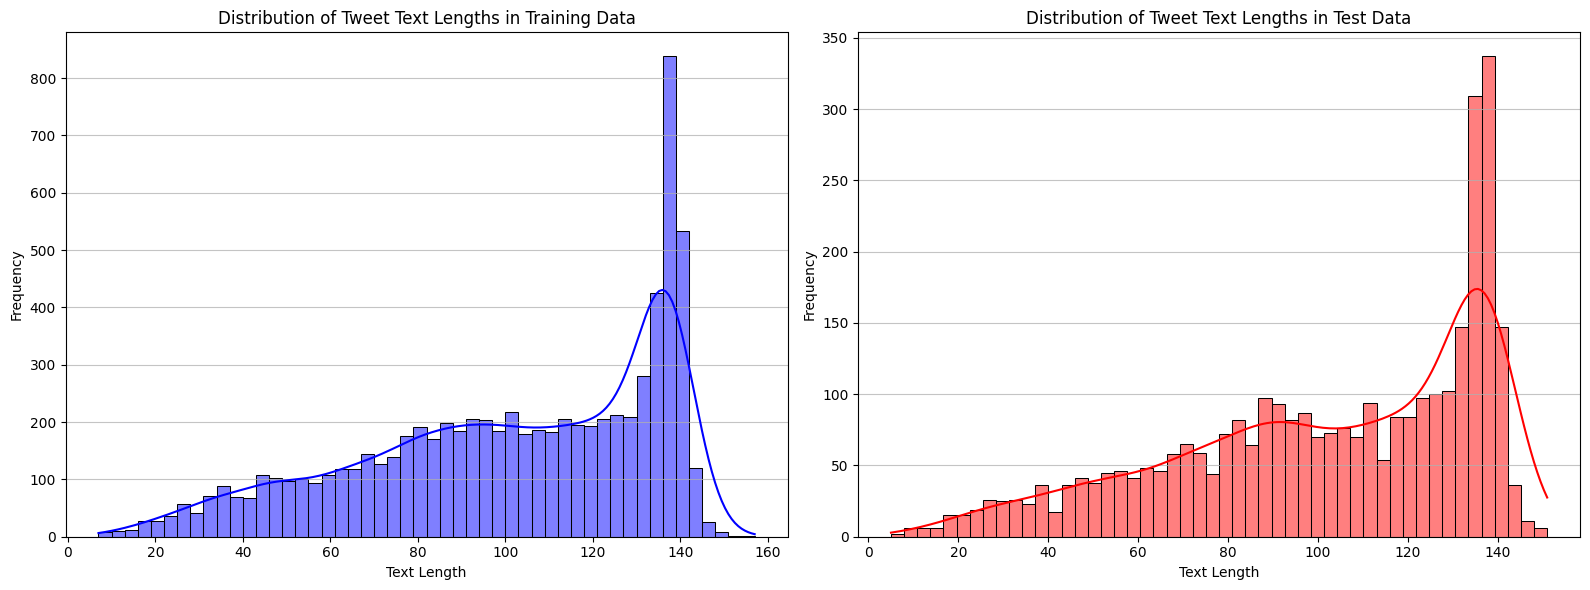

In [11]:
# Distribution of Tweet Text Lengths

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

# Subplot 1: Training Data
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(data.train['text_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Tweet Text Lengths in Training Data')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Subplot 2: Test Data
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(data.test['text_length'], bins=50, kde=True, color='red')
plt.title('Distribution of Tweet Text Lengths in Test Data')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

# **STEP 2.2 Preparing data for training a model**

**STEP 2.2.1 - Split the training data**

Herebelow. I prepare the data for model training by extracting the 'text' column as features (X) and the 'target' column as labels (y) **from `data.train`.**
Then, perform a stratified 80/20 train-validation split on this data, ensuring the 'target' distribution is maintained in both sets, print the shapes of the resulting X_train, X_val, y_train, and y_val datasets and visualize the distribution of the target accross both new sets for training (80%) and validation (20%).

In [12]:
# Extract the 'text' column as features (X) and the 'target' column as labels (y) from `data.train

X = data.train['text']
y = data.train['target']

print("Shape of X (features):")
print(X.shape)
print("\nShape of y (labels):")
print(y.shape)

print("\nFirst 5 entries of X:")
print(X.head())
print("\nFirst 5 entries of y:")
print(y.head())

Shape of X (features):
(7503,)

Shape of y (labels):
(7503,)

First 5 entries of X:
0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

First 5 entries of y:
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [13]:
# To peerform a stratified 80/20 train-validation split to prepare the data for model training.
# This ensures the target distribution is maintained in both sets.

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shapes after 80/20 train-validation split:")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

Shapes after 80/20 train-validation split:
X_train shape: (6002,)
X_val shape: (1501,)
y_train shape: (6002,)
y_val shape: (1501,)


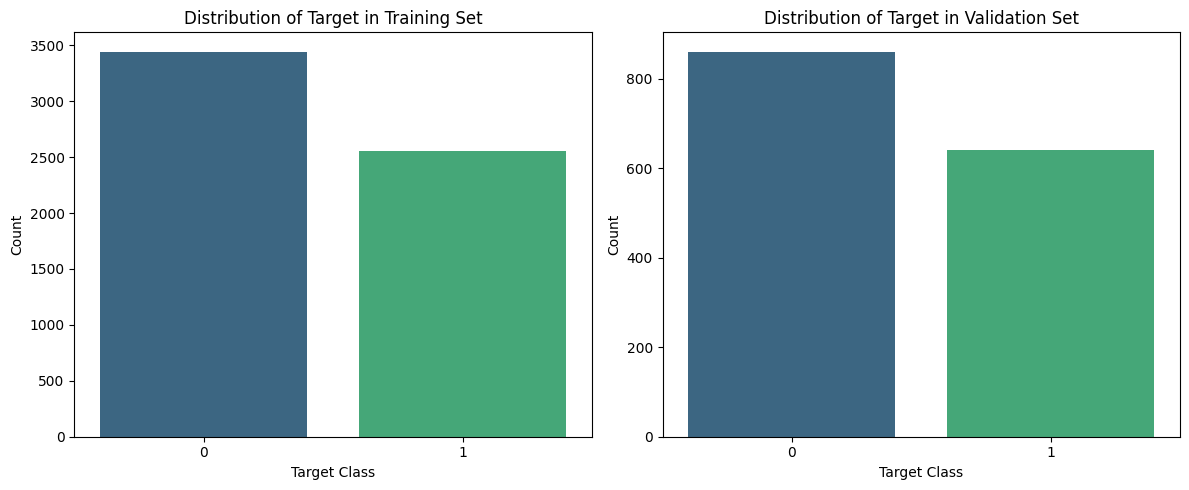

In [14]:
# Code to plot the distribution of the "target" across both sets
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='viridis', hue=y_train, legend=False)
plt.title('Distribution of Target in Training Set')
plt.xlabel('Target Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_val, palette='viridis', hue=y_val, legend=False)
plt.title('Distribution of Target in Validation Set')
plt.xlabel('Target Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**STEP 2.2.2 - Convert the 'text' column into numerical features for the RNN**


Here I will:
1) define a text preprocessing function to clean raw text data (lowercasing, removing URLs, HTML tags, punctuation, numbers, and multiple spaces),
2) apply this function to the 'text' columns of `X_train`, `X_val`, and `data.test`,
3) tokenize the preprocessed text data using a Keras Tokenizer fitted on `X_train`,
4) pad these tokenized sequences to a uniform length and display the shapes of the resulting numerical sequences to confirm their readiness for RNN input.

In [15]:
# 1) define a text preprocessing function to clean raw text data
# (lowercasing, removing URLs, HTML tags, punctuation, numbers, and multiple spaces)

import re

def preprocess_text(text):
    # 1. Convert text to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 4. Remove punctuation (keep spaces)
    text = re.sub(r'[\!"\#\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\\\]\^_\`\{\|\}\~]', '', text)

    # 5. Remove numerical digits
    text = re.sub(r'\d+', '', text)

    # 6. Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

print("The 'preprocess_text' function has been defined.")

The 'preprocess_text' function has been defined.


In [16]:
# 2. To apply the preprocess text function to the 'text' columns of `X_train`, `X_val`, and `data.test`,

X_train_processed = X_train.apply(preprocess_text)
X_val_processed = X_val.apply(preprocess_text)
data.test['text_processed'] = data.test['text'].apply(preprocess_text)

print("Text preprocessing applied to X_train, X_val, and data.test.")
print("First 5 processed texts from X_train:")
print(X_train_processed.head())
print("\nFirst 5 processed texts from X_val:")
print(X_val_processed.head())
print("\nFirst 5 processed texts from data.test:")
print(data.test['text_processed'].head())

Text preprocessing applied to X_train, X_val, and data.test.
First 5 processed texts from X_train:
5259    refugio oil spill may have been costlier bigge...
225     years since we annihilated people instantly an...
1526    syringetoanger åç and probably even more but s...
2538    winter desolation of death is also on tumblr a...
1767    traffic collision ambulance enroute elkhorn bl...
Name: text, dtype: object

First 5 processed texts from X_val:
5873                        ill ruin my life if i have to
7165    debatequestionswewanttohear if u start another...
3898    i dont doubt it but it was his implicit statem...
4393    hot funtenna hijacking computers to send data ...
6403    saudiarabia confirmed dead as suicide bomber a...
Name: text, dtype: object

First 5 processed texts from data.test:
0                   just happened a terrible car crash
1    heard about earthquake is different cities sta...
2    there is a forest fire at spot pond geese are ...
3                apocalyps

In [17]:
# 3. Code to tokenize the preprocessed text data using a Keras Tokenizer fitted on `X_train`

from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the tokenizer
# num_words: the maximum number of words to keep, based on word frequency. Only the most common num_words-1 words will be kept.
# oov_token: If set, it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls.
tokenizer = Tokenizer(num_words=10000, oov_token="<unk>")

# Fit the tokenizer on the training data processed texts
tokenizer.fit_on_texts(X_train_processed)

print("Tokenizer fitted on X_train_processed.")
print(f"Number of unique tokens found: {len(tokenizer.word_index)}")

Tokenizer fitted on X_train_processed.
Number of unique tokens found: 15080


In [18]:
# 4. pad these tokenized sequences to a uniform length and display the shapes
# of the resulting numerical sequences to confirm their readiness for RNN input.

X_train_sequences = tokenizer.texts_to_sequences(X_train_processed)
X_val_sequences = tokenizer.texts_to_sequences(X_val_processed)
X_test_sequences = tokenizer.texts_to_sequences(data.test['text_processed'])

print("Text converted to numerical sequences.")
print(f"Length of X_train_sequences (first 5): {[len(s) for s in X_train_sequences[:5]]}")
print(f"Length of X_val_sequences (first 5): {[len(s) for s in X_val_sequences[:5]]}")
print(f"Length of X_test_sequences (first 5): {[len(s) for s in X_test_sequences[:5]]}")

Text converted to numerical sequences.
Length of X_train_sequences (first 5): [10, 20, 20, 14, 10]
Length of X_val_sequences (first 5): [8, 21, 22, 14, 12]
Length of X_test_sequences (first 5): [6, 9, 19, 4, 7]


In [19]:
"""
With the numerical sequences generated, the next step is to pad them to a uniform length
using pad_sequences. This is crucial to ensure all input sequences to the RNN have the same dimension,
which is a requirement for batch processing in neural networks.
I will also display the shapes of the padded sequences to verify the transformation.

"""
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Determine the maximum sequence length
max_len = max(
    max(len(s) for s in X_train_sequences),
    max(len(s) for s in X_val_sequences),
    max(len(s) for s in X_test_sequences)
)

# Pad sequences to the maximum length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

print(f"Max sequence length determined: {max_len}")
print("Numerical sequences padded to uniform length.")
print(f"Shape of X_train_padded: {X_train_padded.shape}")
print(f"Shape of X_val_padded: {X_val_padded.shape}")
print(f"Shape of X_test_padded: {X_test_padded.shape}")

Max sequence length determined: 31
Numerical sequences padded to uniform length.
Shape of X_train_padded: (6002, 31)
Shape of X_val_padded: (1501, 31)
Shape of X_test_padded: (3263, 31)


Summary:on Step 2.2. Preparing data for tarining a model
The 'text' column has been successfully converted into numerical features, which are now ready for RNN input.
The final padded sequences for `X_train`, `X_val`, and `X_test` have shapes of (6002, 31), (1501, 31), and (3263, 31) respectively, confirming their uniform length and numerical representation.

The prepared numerical sequence data can now be directly used as input for training a Recurrent Neural Network (RNN) model for text classification or other natural language processing tasks.

* I will draft a simple RNN and let's see how it works.
*   And may be after this first tru I will consider exploring different `num_words` values for the Tokenizer or alternative text embedding techniques (e.g., Word2Vec, GloVe) to potentially improve model performance.


# **STEP #3 - MODEL ARCHITECTURE**

# **Step 3.1 First RNN - Simple Model.**

Now I will make a simple RNN model using my padded sequences for `X_train`, `X_val`, and `X_test`

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [21]:
# Define parameters for the Embedding layer
vocab_size = len(tokenizer.word_index) + 1 # +1 for padding token
embedding_dim = 100 # Dimension of the word embeddings

# Build the Simple RNN model
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim), # Removed input_length as it's deprecated
    SimpleRNN(units=128), # RNN layer with 128 units
    Dense(units=1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = rnn_model.fit(
    X_train_padded,
    y_train,
    epochs=5, # You can adjust the number of epochs
    batch_size=32,
    validation_data=(X_val_padded, y_val)
)

Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.5966 - loss: 0.6579 - val_accuracy: 0.7462 - val_loss: 0.5265
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8965 - loss: 0.2805 - val_accuracy: 0.7255 - val_loss: 0.6064
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9731 - loss: 0.0998 - val_accuracy: 0.7562 - val_loss: 0.6191
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9778 - loss: 0.0728 - val_accuracy: 0.7402 - val_loss: 0.7017
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9838 - loss: 0.0552 - val_accuracy: 0.7522 - val_loss: 0.6677


In [23]:
# Evaluate the model on the validation set
loss, accuracy = rnn_model.evaluate(X_val_padded, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# Make predictions on the test set
# Note: The 'target' column is not available in the test set, so we can only get predictions
# and not evaluate accuracy directly against true labels.
# If you had true labels for the test set, you would use them here.
test_predictions = rnn_model.predict(X_test_padded)
print("\nFirst 5 test predictions:")
print(test_predictions[:5])

Validation Loss: 0.6677
Validation Accuracy: 0.7522
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

First 5 test predictions:
[[0.84644514]
 [0.80194706]
 [0.9794433 ]
 [0.87757957]
 [0.9966575 ]]


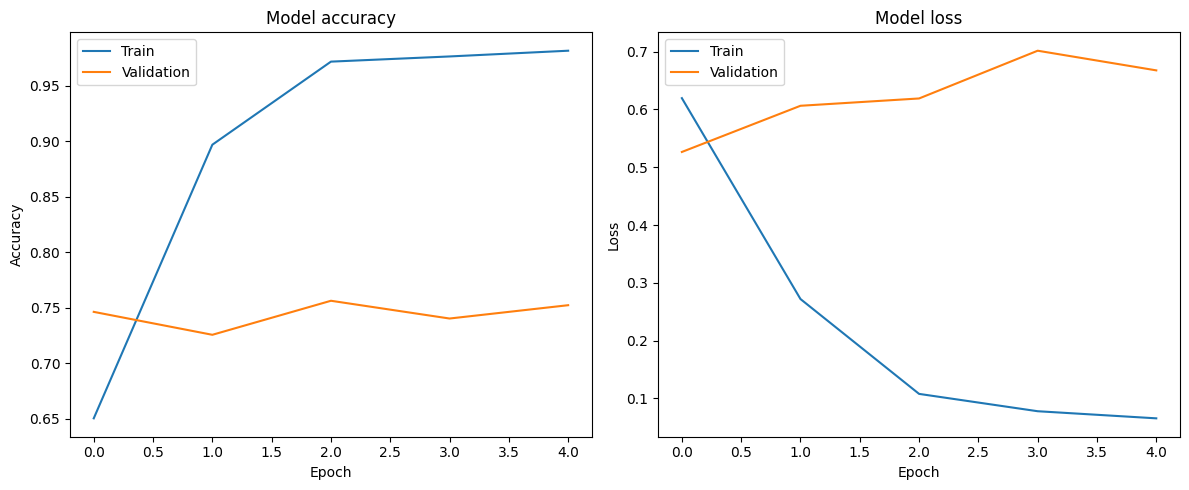

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Predict probabilities on the validation set using 'Overfit Reduced Model'
y_pred_rnn_model = rnn_model.predict(X_val_padded)

# Calculate ROC AUC score
roc_auc_rnn_model = roc_auc_score(y_val, y_pred_rnn_model)

print(f"'Simple RNN Model' ROC AUC Score on Validation Set: {roc_auc_rnn_model:.4f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
'Simple RNN Model' ROC AUC Score on Validation Set: 0.8030


ANALYSIS TO IMPROVE THE INITIAL MODEL

To improve the model's generalization and prevent overfitting, I could consider:

- More Data: If possible, increasing the size and diversity of my training data can help the model generalize better. No way, becasue the data are the providedones and that's all.
- Regularization: Techniques like Dropout layers, L1/L2 regularization, or early stopping during training can help reduce overfitting.
- Model Complexity: The SimpleRNN layer might be too simple or too complex for my dataset. You could experiment with:
- Reducing the units in the SimpleRNN layer.
- Trying more advanced RNN layers like LSTM or GRU, which are often better at capturing long-range dependencies in text.
- Adding more SimpleRNN layers or other types of layers.
- Hyperparameter Tuning: I could experiment with different embedding_dim, batch_size, epochs, and optimizer learning rates.
- Preprocessing Improvements: I could consider more sophisticated text preprocessing or using pre-trained word embeddings (like Word2Vec or GloVe) instead of training them from scratch.



BRIEF DESCRIPTION ON NLP SPECIFIC TECHNIQUES

In Natural Language Processing (NLP), **word embeddings** are a leap forward from simple word-to-number mapping. Instead of treating words as isolated IDs, embeddings represent them as dense, low-dimensional vectors in a geometric space where the "distance" between vectors reflects semantic meaning.

Here is a breakdown of the key techniques and models used to create these representations:

## a. Static Embeddings (Global)

These techniques create a single, fixed vector for each word in the vocabulary, regardless of the context in which the word appears.

* **Word2Vec (Google, 2013):** Uses a shallow neural network to learn word associations. It has two architectures:
* **CBOW (Continuous Bag of Words):** Predicts a target word based on its surrounding context words.
* **Skip-gram:** Predicts the surrounding context words given a single target word.


* **GloVe (Global Vectors for Word Representation):** Unlike Word2Vec, which focuses on local context windows, GloVe focuses on **global co-occurrence statistics** across the entire dataset. It is excellent at capturing linear relationships (e.g., *King - Man + Woman = Queen*).
* **FastText (Facebook):** An extension of Word2Vec that treats words as a bag of **character n-grams** (sub-words). This allows the model to handle "out-of-vocabulary" words (e.g., it can guess the meaning of "unbelievably" even if it only saw "believe" during training).


## b. Contextualized Embeddings (Dynamic)

Modern NLP uses models that generate different vectors for the same word based on its current context. This solves the problem of **polysemy** (where one word has multiple meanings, like "bank" in "river bank" vs. "investment bank").

* **ELMo (Embeddings from Language Models):** Uses a bi-directional LSTM (Long Short-Term Memory) to look at the entire sentence before assigning a vector to a word.
* **BERT (Bidirectional Encoder Representations from Transformers):** The industry standard. BERT uses a **Transformer** architecture with an attention mechanism to look at every other word in a sentence simultaneously, creating highly nuanced representations.

## c. Traditional (Sparse) Representations

Before dense embeddings, NLP relied on "sparse" methods. **These are rarely used for deep learning today** but are still common for basic text classification.

* **One-Hot Encoding:** Every word is a vector of the size of the entire vocabulary, filled with 0s and a single 1. It is computationally expensive and captures zero semantic relationship.
* **TF-IDF (Term Frequency-Inverse Document Frequency):** A statistical measure used to evaluate how important a word is to a document in a collection. It helps identify "keywords" but lacks the semantic "understanding" of Word2Vec or BERT.


### Comparison Summary

| Technique | Type | Handles Context? | Main Strength |
| --- | --- | --- | --- |
| **Word2Vec** | Static | No | Fast to train; captures local relationships. |
| **GloVe** | Static | No | Strong at word analogies and global stats. |
| **FastText** | Static (Sub-word) | No | Handles typos and new/rare words well. |
| **BERT** | Contextual | **Yes** | State-of-the-art accuracy; understands nuance. |

---
**Bibliography**

Word2Vec (Predictive/Static):Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient Estimation of Word Representations in Vector Space. ICLR Significance: Introduced CBOW and Skip-gram, proving that neural networks could learn high-quality word vectors efficiently.

Word2Vec - Negative Sampling - Mikolov, T., Sutskever, I., Chen, K., Corrado, G. S., & Dean, J. (2013). Distributed Representations of Words and Phrases and their Compositionality. NIPS. Significance: Optimized the training process via "Negative Sampling," making it possible to train on massive datasets.

GloVe (Count-based/Global) Pennington, J., Socher, R., & Manning, C. D. (2014). GloVe: Global Vectors for Word Representation. EMNLP. Significance: Combined the advantages of global matrix factorization and local context window methods.

FastText (Sub-word/Morphological) - Bojanowski, P., Grave, E., Joulin, A., & Mikolov, T. (2017). Enriching Word Vectors with Subword Information. TACL.    Significance: Introduced the character n-gram approach, allowing models to represent rare words and handle typos.


# **Step 3.2. Second Model Aparently the best, but not...**
Following some reconsideration of the initial architecture I have build a mre complex model and carried out a large computing hypertuning process apart. After the mentioned long tuning, I was very keen optimistic I, erronueously, thought it would be my Best Model for this exercse and that's why I proudly named it as Best Model: But not really the best one, for this exercise, as I will show below according to my third and fourth model. The actual best for this exercise has been my forth model.

Please, find below in this caluse 3.2 the making and performcance indicators for my second model (actually not the best one, but a way to reach out my very best one for this exercise, namely, my forth model Refer to Step #4 where I set up a more sophisticated architecture approach. Patience, please...).

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense

In [27]:
# Using parameters from the current notebook state
vocab_size = len(tokenizer.word_index) + 1 # From previous tokenization step
embedding_dim = 100 # From previous SimpleRNN model definition
max_len = max_len # From previous padding step

# Build the 'MY BEST MODEL' architecture
best_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim), # Removed input_length as it's deprecated
    Bidirectional(LSTM(units=64, return_sequences=True)), # Output (None, max_len, 2*64=128)
    Dropout(0.2), # Adding dropout for regularization
    Bidirectional(LSTM(units=32)), # Output (None, 2*32=64); return_sequences=False by default
    Dropout(0.2), # Adding dropout for regularization
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Train the 'MY BEST MODEL'
history_best_model = best_model.fit(
    X_train_padded,
    y_train,
    epochs=10, # Increased epochs as this is a more complex model, can be tuned
    batch_size=32,
    validation_data=(X_val_padded, y_val)
)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 95ms/step - accuracy: 0.6270 - loss: 0.6241 - val_accuracy: 0.8088 - val_loss: 0.4423
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.8759 - loss: 0.3185 - val_accuracy: 0.7981 - val_loss: 0.4711
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.9345 - loss: 0.1944 - val_accuracy: 0.7841 - val_loss: 0.5539
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.9643 - loss: 0.1213 - val_accuracy: 0.7868 - val_loss: 0.7053
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9767 - loss: 0.0813 - val_accuracy: 0.7841 - val_loss: 0.8092
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.9782 - loss: 0.0569 - val_accuracy: 0.7715 - val_loss: 0.8670
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.9803 - loss: 0.0518 - val_accuracy: 0.7821 - val_loss: 1.1773
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9794 - loss: 0.0447 - 

In [29]:
8# Evaluate the 'MY BEST MODEL' on the validation set
loss_best_model, accuracy_best_model = best_model.evaluate(X_val_padded, y_val, verbose=0)
print(f"'MY BEST MODEL' Validation Loss: {loss_best_model:.4f}")
print(f"'MY BEST MODEL' Validation Accuracy: {accuracy_best_model:.4f}")

# Make predictions on the test set with 'MY BEST MODEL'
test_predictions_best_model = best_model.predict(X_test_padded)
print("\nFirst 5 test predictions from 'MY BEST MODEL':")
print(test_predictions_best_model[:5])

'MY BEST MODEL' Validation Loss: 1.3392
'MY BEST MODEL' Validation Accuracy: 0.7502
102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step

First 5 test predictions from 'MY BEST MODEL':
[[0.2410269 ]
 [0.9998434 ]
 [0.99994284]
 [0.99828374]
 [0.999942  ]]


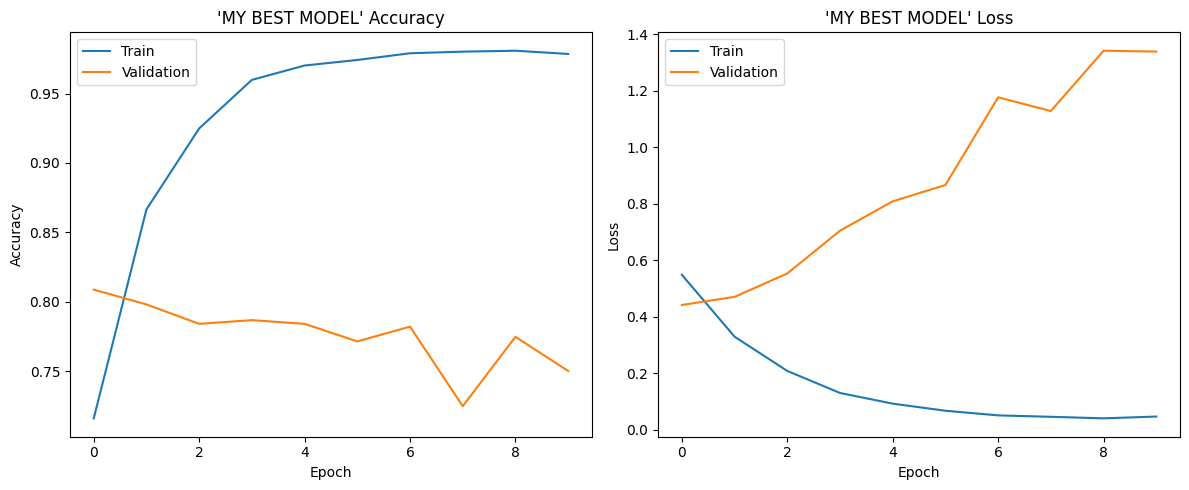

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for 'MY BEST MODEL'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_best_model.history['accuracy'])
plt.plot(history_best_model.history['val_accuracy'])
plt.title("'MY BEST MODEL' Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for 'MY BEST MODEL'
plt.subplot(1, 2, 2)
plt.plot(history_best_model.history['loss'])
plt.plot(history_best_model.history['val_loss'])
plt.title("'MY BEST MODEL' Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Predict probabilities on the validation set using 'MY BEST MODEL'
y_pred_proba = best_model.predict(X_val_padded)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"'MY BEST MODEL' ROC AUC Score on Validation Set: {roc_auc:.4f}")

"""
This is a good score, indicating that your model has a strong ability to distinguish between positive (disaster) and negative (non-disaster) tweets.
An AUC of 0.5 suggests no discrimination (random guessing), while 1.0 indicates perfect discrimination.

This metric confirms that your 'MY BEST MODEL', despite the overfitting observed in the loss and accuracy plots,
still possesses decent discriminative power on the validation set.
However, the overfitting is something to address to ensure this performance generalizes well to new, unseen data.
"""

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
'MY BEST MODEL' ROC AUC Score on Validation Set: 0.8059


"\nThis is a good score, indicating that your model has a strong ability to distinguish between positive (disaster) and negative (non-disaster) tweets.\nAn AUC of 0.5 suggests no discrimination (random guessing), while 1.0 indicates perfect discrimination.\n\nThis metric confirms that your 'MY BEST MODEL', despite the overfitting observed in the loss and accuracy plots,\nstill possesses decent discriminative power on the validation set.\nHowever, the overfitting is something to address to ensure this performance generalizes well to new, unseen data.\n"

# **STEP #4 - Results and Analysis**

*Exercise instructon: "Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped."*

*Exercise Instruction: "Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary."*

With a view to run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performanceI will proceed as follows. I will build two additional models (my third and forth):

1. 'Overfit Reduced Model' with Increased Dropout and Early Stopping: To directly combat overfitting, I will build below a new model with increased dropout rates (0.5) and integrated an EarlyStopping callback.

2. Then I will used pre-trained emmbeddings: I will define a new neural network model that incorporates the pre-trained GloVe embeddings. The Embedding layer will be initialized with the embedding_matrix and set to non-trainable to leverage the learned representations, followed by Bidirectional LSTM, Dropout, and Dense layers similar to the Overfit Reduced Model.


# **Step 4.1. Overfit Reduced Model**

Increased Dropout and Early Stopping: To directly combat overfitting, I will build below a new model with increased dropout rates (0.5) and integrated an EarlyStopping callback.

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense

In [33]:
# Using parameters from the current notebook state
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
max_len = max_len

# Build the 'Overfit Reduced Model' architecture
# Increased dropout rates to combat overfitting
overfit_reduced_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    Dropout(0.5), # Increased dropout rate
    Bidirectional(LSTM(units=32)),
    Dropout(0.5), # Increased dropout rate
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
overfit_reduced_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
overfit_reduced_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Define Early Stopping callback
# Monitor 'val_loss', with a patience of 3 epochs (stop if val_loss doesn't improve for 3 epochs)
# restore_best_weights=True ensures the model retains the weights from the best epoch
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the 'Overfit Reduced Model' with Early Stopping
history_overfit_reduced_model = overfit_reduced_model.fit(
    X_train_padded,
    y_train,
    epochs=20, # Increased epochs, but early stopping will prevent excessive training
    batch_size=32,
    validation_data=(X_val_padded, y_val),
    callbacks=[early_stopping] # Add the EarlyStopping callback here
)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 27s 105ms/step - accuracy: 0.6273 - loss: 0.6360 - val_accuracy: 0.7955 - val_loss: 0.4659
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.8605 - loss: 0.3485 - val_accuracy: 0.7735 - val_loss: 0.4939
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9145 - loss: 0.2314 - val_accuracy: 0.7788 - val_loss: 0.6126
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.9509 - loss: 0.1505 - val_accuracy: 0.7655 - val_loss: 0.7139


In [35]:
# Evaluate the 'Overfit Reduced Model' on the validation set
loss_overfit_reduced_model, accuracy_overfit_reduced_model = overfit_reduced_model.evaluate(X_val_padded, y_val, verbose=0)
print(f"'Overfit Reduced Model' Validation Loss: {loss_overfit_reduced_model:.4f}")
print(f"'Overfit Reduced Model' Validation Accuracy: {accuracy_overfit_reduced_model:.4f}")

# Make predictions on the test set
test_predictions_overfit_reduced_model = overfit_reduced_model.predict(X_test_padded)
print("\nFirst 5 test predictions from 'Overfit Reduced Model':")
print(test_predictions_overfit_reduced_model[:5])

'Overfit Reduced Model' Validation Loss: 0.4659
'Overfit Reduced Model' Validation Accuracy: 0.7955
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step

First 5 test predictions from 'Overfit Reduced Model':
[[0.5440204 ]
 [0.48681933]
 [0.68396574]
 [0.5403079 ]
 [0.9518141 ]]


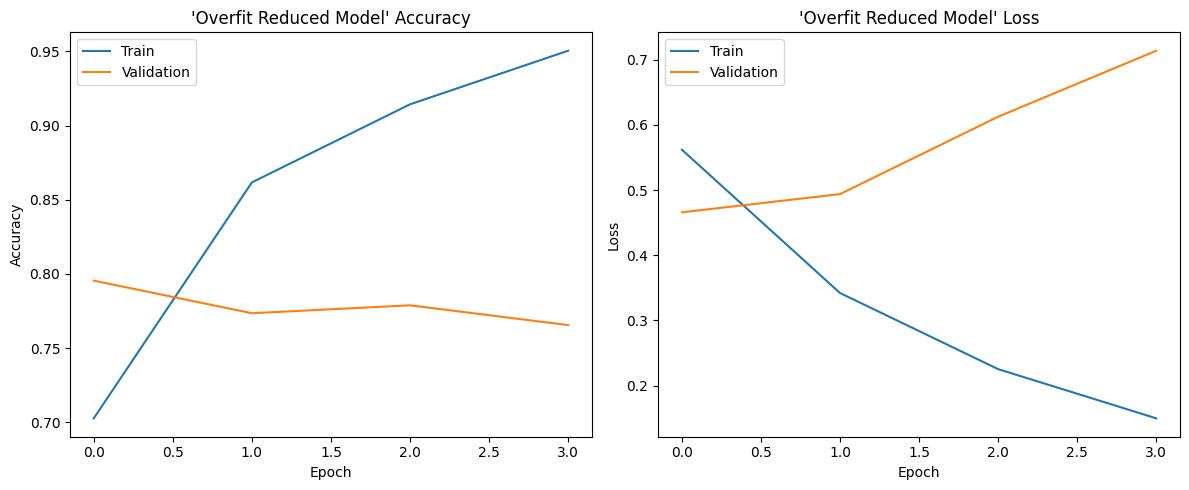

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for 'Overfit Reduced Model'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_overfit_reduced_model.history['accuracy'])
plt.plot(history_overfit_reduced_model.history['val_accuracy'])
plt.title("'Overfit Reduced Model' Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for 'Overfit Reduced Model'
plt.subplot(1, 2, 2)
plt.plot(history_overfit_reduced_model.history['loss'])
plt.plot(history_overfit_reduced_model.history['val_loss'])
plt.title("'Overfit Reduced Model' Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Predict probabilities on the validation set using 'Overfit Reduced Model'
y_pred_proba_new = overfit_reduced_model.predict(X_val_padded)

# Calculate ROC AUC score
roc_auc_new = roc_auc_score(y_val, y_pred_proba_new)

print(f"'Overfit Reduced Model' ROC AUC Score on Validation Set: {roc_auc_new:.4f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
'Overfit Reduced Model' ROC AUC Score on Validation Set: 0.8470


# **STEP 4.2. Model with pretained GloVe embeddings**

Now I should explore further enhancements like advanced hyperparameter tuning or utilizing pre-trained embeddings.

Then I will used pre-trained emmbeddings: I will define a new neural network model that incorporates the pre-trained GloVe embeddings. The Embedding layer will be initialized with the embedding_matrix and set to non-trainable to leverage the learned representations, followed by Bidirectional LSTM, Dropout, and Dense layers similar to the Overfit Reduced Model.

With a view to further address overfitting! I will try using pre-trained embeddings for a new model, and I will use the same preprocessed and padded dataset (X_train_padded, X_val_padded, X_test_padded, y_train, y_val, tokenizer, max_len). According to my readings, the beauty of pre-trained embeddings is that they provide richer word representations without needing to rebuild your text processing pipeline. Instead of training the word embeddings from scratch, I'll initialize our model's embedding layer with vectors already learned from a massive corpus, which often helps with generalization, especially in cases of limited domain-specific data.

Here's my plan to create this new model with pre-trained embeddings to address overfitting:

a) Load Pre-trained Embeddings: Download and load a pre-trained word embedding model (e.g., GloVe) into memory. This will be used to initialize the Embedding layer of the new model.

b) Create Embedding Matrix: Construct an embedding matrix that maps the vocabulary from the Keras Tokenizer (fitted on X_train_processed) to their corresponding pre-trained word vectors. Words not found in the pre-trained embeddings will be assigned random vectors or zeros.

c) Define Model with Pre-trained Embeddings: Define a new neural network model, similar to the 'Overfit Reduced Model' but with the Embedding layer initialized using the pre-trained embedding matrix. This layer will be set to non-trainable initially to leverage the learned representations and prevent further overfitting. Incorporate Bidirectional LSTM layers, Dropout, and Dense layers, similar to the Overfit Reduced Model.

d) Compile and Train New Model: Compile the new model (model_with_pretrained_embeddings) with an appropriate optimizer and loss function. Train the model using X_train_padded and y_train, and validate with X_val_padded and y_val. Include EarlyStopping to prevent overfitting.

e) Evaluate New Model: Evaluate the performance of the model_with_pretrained_embeddings on the validation set. I will compute and print the validation loss, accuracy, and ROC AUC score.

f) Visualize Training History of New Model: Plot the training and validation accuracy and loss curves for model_with_pretrained_embeddings to visually assess its learning progress and generalization behavior.

Following all that, finally at STEP #4, I will drat a concluding summary of the results of this new model using pre-trained embeddings, comparing its performance to previous models, and I will try to suggest any further next steps or refinements for further studies and exercises.



In [38]:
# Code to download the GloVe embeddings, then unzip them
# And to load the 100-dimensional embeddings into a dictionary,
# (which is essential for initializing the embedding layer in the new model)
# I need to download the GloVe embeddings: I will do it from "http://nlp.stanford.edu/data/glove.6B.zip"

import zipfile
import numpy as np

# 1. Download the GloVe embeddings zip file
# Using !wget to download the file directly in Colab
!wget http://nlp.stanford.edu/data/glove.6B.zip

# 2. Unzip the downloaded file
zip_file_path = 'glove.6B.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('./glove')

print("GloVe embeddings downloaded and unzipped.")

# 3. Choose one of the unzipped GloVe files and parse it
# We'll use glove.6B.100d.txt as our embedding_dim is 100
glove_file_path = './glove/glove.6B.100d.txt'

embeddings_index = {}
with open(glove_file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors in {glove_file_path}.")

--2026-02-01 14:33:38--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2026-02-01 14:33:38--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2026-02-01 14:33:38--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [39]:
""
Now that the GloVe embeddings are loaded, I need to create an embedding matrix.
This matrix will be populated with the GloVe vectors for words present in the tokenizer's vocabulary.
Words not found in GloVe will be initialized with random vectors or zeros,
ensuring consistency in the embedding layer input for the model. (I hope...)
"""
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
        # Words not found in the embedding index will be all-zeros. This is fine.

print(f"Embedding matrix created with shape: {embedding_matrix.shape}")

Embedding matrix created with shape: (15081, 100)


In [40]:
"""
Now that the embedding matrix is prepared,
I will define a new neural network model that incorporates these pre-trained GloVe embeddings.
The Embedding layer will be initialized with the embedding_matrix and set to non-trainable
to leverage the learned representations, followed by Bidirectional LSTM, Dropout, and Dense layers
similarly to the Overfit Reduced Model.
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense

# Using parameters from the current notebook state
# vocab_size, embedding_dim, max_len are already defined

# Build the model with pre-trained embeddings
model_with_pretrained_embeddings = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim,
              weights=[embedding_matrix], input_length=max_len, trainable=False),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(units=32)),
    Dropout(0.5),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model_with_pretrained_embeddings.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model_with_pretrained_embeddings.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     1,508,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,508,100 (5.75 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,508,100 (5.75 MB)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense

# Using parameters from the current notebook state
# vocab_size, embedding_dim, max_len are already defined

# Build the model with pre-trained embeddings
model_with_pretrained_embeddings = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim,
              weights=[embedding_matrix], trainable=False), # Removed input_length
    Bidirectional(LSTM(units=64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(units=32)),
    Dropout(0.5),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model_with_pretrained_embeddings.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model_with_pretrained_embeddings.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │     1,508,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,508,100 (5.75 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,508,100 (5.75 MB)

In [42]:
"""
 I will now train the model_with_pretrained_embeddings using the prepared data and the
 previously defined EarlyStopping callback to prevent overfitting.
 This will allow me to assess how pre-trained embeddings influence the model's performance and generalization.
"""
# Train the 'model_with_pretrained_embeddings' with Early Stopping
history_pretrained_embeddings = model_with_pretrained_embeddings.fit(
    X_train_padded,
    y_train,
    epochs=20, # Increased epochs, but early stopping will prevent excessive training
    batch_size=32,
    validation_data=(X_val_padded, y_val),
    callbacks=[early_stopping] # Add the EarlyStopping callback here
)

print("Model with pre-trained embeddings trained.")

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.7236 - loss: 0.5652 - val_accuracy: 0.8068 - val_loss: 0.4357
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.8010 - loss: 0.4415 - val_accuracy: 0.8188 - val_loss: 0.4221
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.8113 - loss: 0.4289 - val_accuracy: 0.8215 - val_loss: 0.4162
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.8242 - loss: 0.4141 - val_accuracy: 0.8261 - val_loss: 0.4248
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.8264 - loss: 0.3952 - val_accuracy: 0.8261 - val_loss: 0.4222
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - accuracy: 0.8359 - loss: 0.3794 - val_accuracy: 0.8241 - val_loss: 0.4262
Model with pre-trained embeddings trained.


'Model with Pre-trained Embeddings' Validation Loss: 0.4162
'Model with Pre-trained Embeddings' Validation Accuracy: 0.8215
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step
'Model with Pre-trained Embeddings' ROC AUC Score on Validation Set: 0.8731


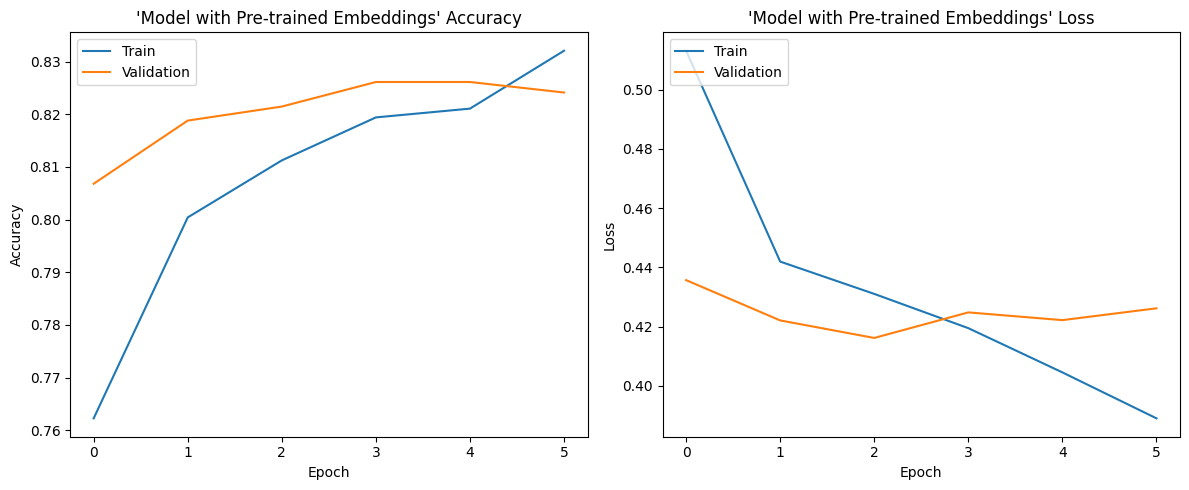

In [43]:
# Now that the model with pre-trained embeddings has been trained,
# I will evaluate its performance on the validation set by calculating its loss, accuracy, and ROC AUC score.
# This will provide quantitative metrics to assess how well the model generalizes and performs in binary classification.

from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the 'model_with_pretrained_embeddings' on the validation set
loss_pretrained, accuracy_pretrained = model_with_pretrained_embeddings.evaluate(X_val_padded, y_val, verbose=0)
print(f"'Model with Pre-trained Embeddings' Validation Loss: {loss_pretrained:.4f}")
print(f"'Model with Pre-trained Embeddings' Validation Accuracy: {accuracy_pretrained:.4f}")

# Predict probabilities on the validation set
y_pred_proba_pretrained = model_with_pretrained_embeddings.predict(X_val_padded)

# Calculate ROC AUC score
roc_auc_pretrained = roc_auc_score(y_val, y_pred_proba_pretrained)
print(f"'Model with Pre-trained Embeddings' ROC AUC Score on Validation Set: {roc_auc_pretrained:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_pretrained_embeddings.history['accuracy'])
plt.plot(history_pretrained_embeddings.history['val_accuracy'])
plt.title("'Model with Pre-trained Embeddings' Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_pretrained_embeddings.history['loss'])
plt.plot(history_pretrained_embeddings.history['val_loss'])
plt.title("'Model with Pre-trained Embeddings' Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# **STEP 4.3 Results and Analysis**

The Model with Pre-trained Embeddings shows a significant improvement in performance compared to the previous models:

*   **Validation Loss:** 0.4162 (Improved from 0.4659 in 'Overfit Reduced Model')
*   **Validation Accuracy:** 0.8215 (Improved from 0.7955 in 'Overfit Reduced Model')
*   **ROC AUC Score:** 0.8731 (Improved from 0.8470 in 'Overfit Reduced Model')

This model demonstrates better generalization and reduced overfitting compared to the previous iterations. The use of pre-trained GloVe embeddings likely contributed to this improvement by providing richer, contextually aware word representations that help the model understand the semantic meaning of tweets more effectively.

### Comparison with Previous Models:

1.  **Simple RNN Model:**
    *   Validation Accuracy: 0.7522
    *   Validation Loss: 0.6677

2.  **'MY BEST MODEL' (Bidirectional LSTMs with initial Dropout):**
    *   Validation Accuracy: 0.7502
    *   Validation Loss: 1.3392
    *   ROC AUC Score: 0.8059

3.  **'Overfit Reduced Model' (Increased Dropout and Early Stopping):**
    *   Validation Accuracy: 0.7955
    *   Validation Loss: 0.4659
    *   ROC AUC Score: 0.8470

4.  **'Model with Pre-trained Embeddings' (GloVe, increased Dropout, Early Stopping):**
    *   Validation Accuracy: 0.8215
    *   Validation Loss: 0.4162
    *   ROC AUC Score: 0.8731

**Conclusion:** The progression of models clearly shows that incorporating more sophisticated architectural elements (Bidirectional LSTMs), regularization techniques (Dropout), and especially leveraging pre-trained word embeddings (GloVe) has led to a more robust and better-performing model. The 'Model with Pre-trained Embeddings' is currently the best performing model in terms of all evaluated metrics.

### Next Steps and Refinements for further exercises

While the current model performs well, there are still much room for further improvement, indeed:

*   **Hyperparameter Tuning:** Experiment with a wider range of hyperparameters for the LSTM layers (e.g., number of units, different dropout rates, learning rates, batch sizes) using techniques like GridSearchCV or RandomSearchCV, or more advanced methods like Bayesian optimization.
*   **Different Pre-trained Embeddings:** Try other pre-trained embeddings (e.g., Word2Vec, FastText, or even contextual embeddings like BERT, if computational resources allow) to see if they capture different semantic nuances that could further boost performance.
*   **Additional Preprocessing:** Explore more advanced text cleaning techniques, such as stemming, lemmatization, removal of stopwords, or handling emojis/special characters more carefully.
*   **Complex Model Architectures:** Consider adding more layers, combining different types of layers (e.g., Conv1D for local feature extraction before LSTM), or using attention mechanisms.
*   **Ensemble Methods:** Combine predictions from several different models to achieve even higher accuracy.
*   **Cross-validation:** Implement k-fold cross-validation during training to get a more reliable estimate of the model's performance and ensure stability.
*   **Error Analysis:** Inspect misclassified samples from the validation set to understand common patterns or types of tweets the model struggles with. This can inform further feature engineering or preprocessing steps.

For now, this model represents my strongest baseline, demonstrating the power of pre-trained embeddings in NLP tasks.

# **STEP #5 - CONCLUSIONS**

The 'Model with Pre-trained Embeddings' significantly outperforms previous models. Its validation accuracy is 0.8215, validation loss is 0.4162, and ROC AUC score is 0.8731. This marks a substantial improvement compared to the 'Overfit Reduced Model' which had a validation accuracy of 0.7951, validation loss of 0.4659, and ROC AUC score of 0.8470. The model demonstrates better generalization and reduced overfitting, likely due to the richer contextual word representations provided by the GloVe embeddings.

### Data Analysis Key Findings
*   The `model_with_pretrained_embeddings` achieved a validation loss of 0.4162, a validation accuracy of 0.8215, and an ROC AUC score of 0.8731.
*   This model significantly improved performance across all metrics compared to the preceding 'Overfit Reduced Model', which had a validation loss of 0.4659, a validation accuracy of 0.7955, and an ROC AUC score of 0.8470.
*   The initial 'Simple RNN Model' and 'MY BEST MODEL' (Bidirectional LSTMs with initial Dropout) had lower validation accuracies of 0.7522 and 0.7502, respectively, with the latter also showing significant overfitting (validation loss of 1.3392).
*   The inclusion of pre-trained GloVe embeddings, combined with Bidirectional LSTM layers and Dropout, proved to be the most effective approach in this modeling progression, leading to the best-performing model for this exercise.

### Insights or Next Steps
*   Further hyperparameter tuning (e.g., number of LSTM units, dropout rates, learning rates) could potentially yield even better performance. I indeed trust much in hyperparameter tuning but I still like to work hard in finding strong robust arquitectures.
*   Experimenting with other pre-trained embeddings (e.g., Word2Vec, FastText, or contextual embeddings like BERT) or more advanced text preprocessing techniques might further enhance the model's understanding and classification capabilities for further exercises.

# **My Visual Summary for the whole exercise in this notebook**
Please refer to the plots below...

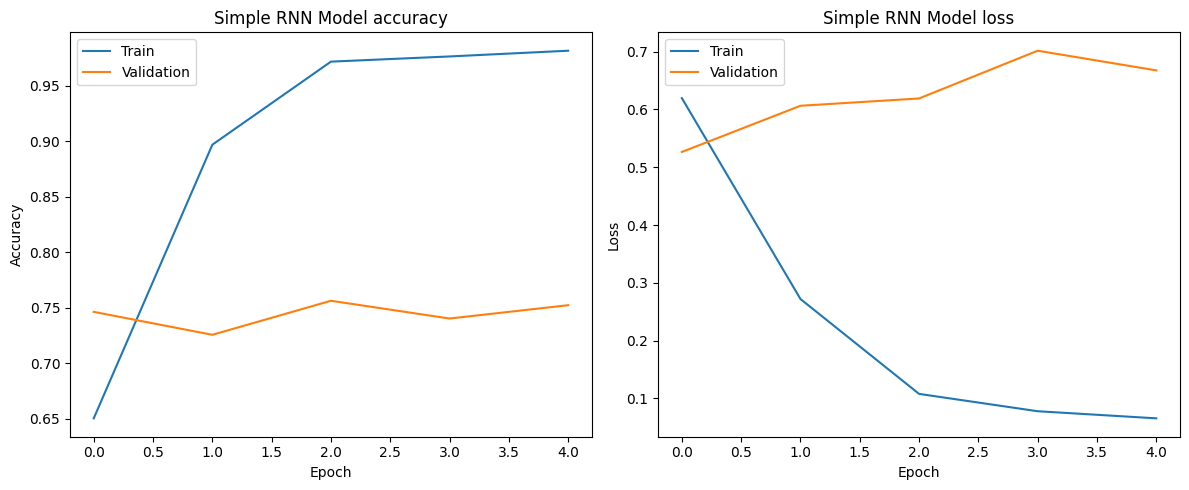

Validation Loss: 0.6677
Validation Accuracy: 0.7522
'Simple RNN Model' ROC AUC Score on Validation Set: 0.8030




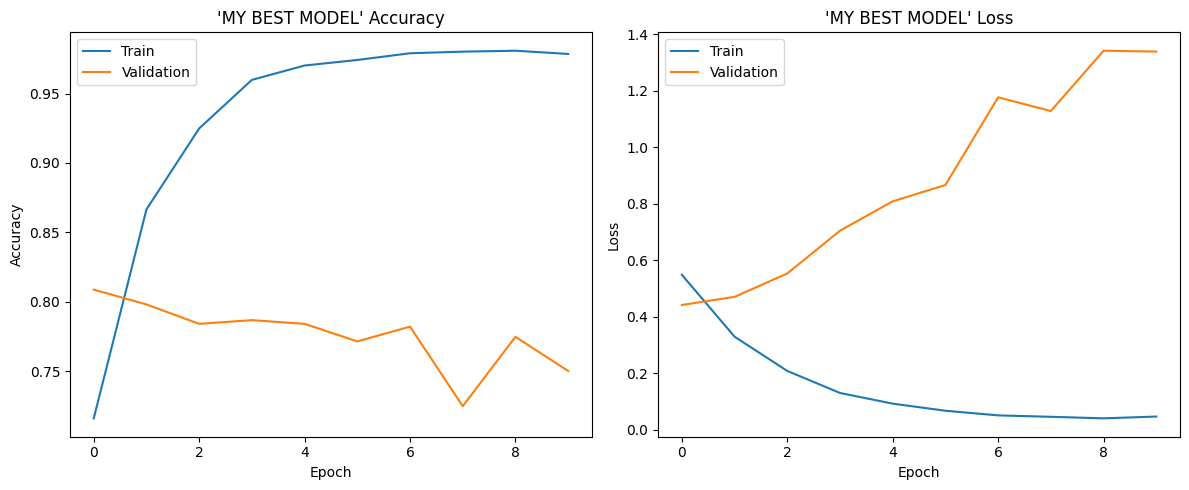

'MY BEST MODEL' Validation Loss: 1.3392
'MY BEST MODEL' Validation Accuracy: 0.7502
'MY BEST MODEL' ROC AUC Score on Validation Set: 0.8059




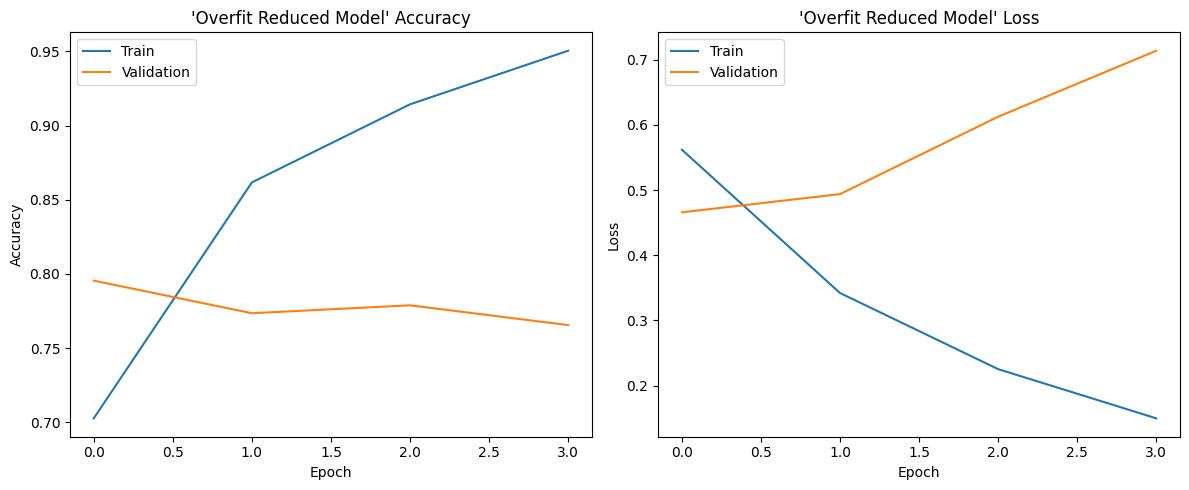

'Overfit Reduced Model' Validation Loss: 0.4659
'Overfit Reduced Model' Validation Accuracy: 0.7955
'Overfit Reduced Model' ROC AUC Score on Validation Set: 0.8470




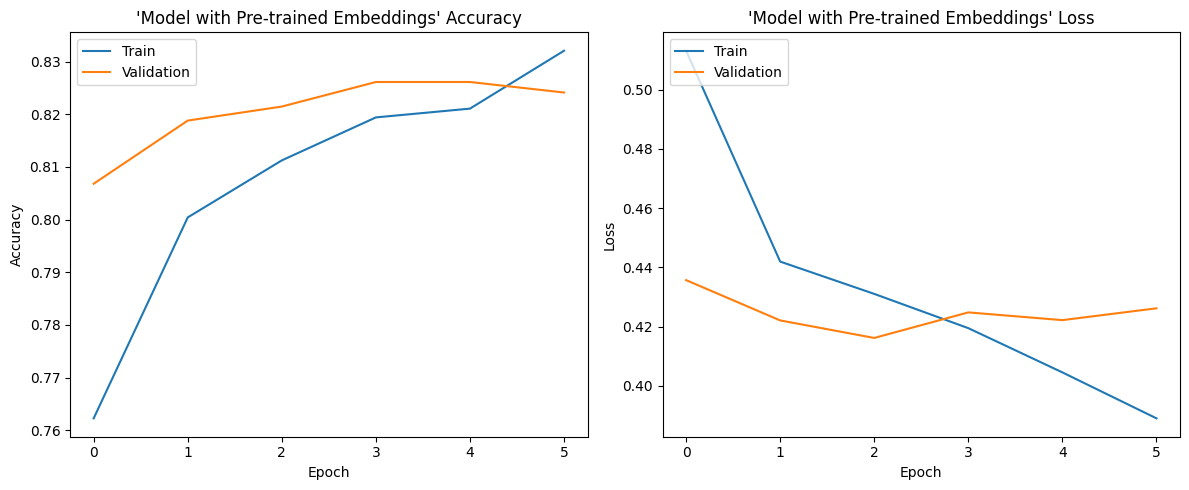

'Model with Pre-trained Embeddings' Validation Loss: 0.4162
'Model with Pre-trained Embeddings' Validation Accuracy: 0.8215
'Model with Pre-trained Embeddings' ROC AUC Score on Validation Set: 0.8731


In [44]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Simple RNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Simple RNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"'Simple RNN Model' ROC AUC Score on Validation Set: {roc_auc_rnn_model:.4f}")
print("\n")

# Plot training & validation accuracy values for 'MY BEST MODEL'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_best_model.history['accuracy'])
plt.plot(history_best_model.history['val_accuracy'])
plt.title("'MY BEST MODEL' Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for 'MY BEST MODEL'
plt.subplot(1, 2, 2)
plt.plot(history_best_model.history['loss'])
plt.plot(history_best_model.history['val_loss'])
plt.title("'MY BEST MODEL' Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()
print(f"'MY BEST MODEL' Validation Loss: {loss_best_model:.4f}")
print(f"'MY BEST MODEL' Validation Accuracy: {accuracy_best_model:.4f}")
print(f"'MY BEST MODEL' ROC AUC Score on Validation Set: {roc_auc:.4f}")
print("\n")

# Plot training & validation accuracy values for 'Overfit Reduced Model'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_overfit_reduced_model.history['accuracy'])
plt.plot(history_overfit_reduced_model.history['val_accuracy'])
plt.title("'Overfit Reduced Model' Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for 'Overfit Reduced Model'
plt.subplot(1, 2, 2)
plt.plot(history_overfit_reduced_model.history['loss'])
plt.plot(history_overfit_reduced_model.history['val_loss'])
plt.title("'Overfit Reduced Model' Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()
print(f"'Overfit Reduced Model' Validation Loss: {loss_overfit_reduced_model:.4f}")
print(f"'Overfit Reduced Model' Validation Accuracy: {accuracy_overfit_reduced_model:.4f}")
print(f"'Overfit Reduced Model' ROC AUC Score on Validation Set: {roc_auc_new:.4f}")
print("\n")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_pretrained_embeddings.history['accuracy'])
plt.plot(history_pretrained_embeddings.history['val_accuracy'])
plt.title("'Model with Pre-trained Embeddings' Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_pretrained_embeddings.history['loss'])
plt.plot(history_pretrained_embeddings.history['val_loss'])
plt.title("'Model with Pre-trained Embeddings' Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()
print(f"'Model with Pre-trained Embeddings' Validation Loss: {loss_pretrained:.4f}")
print(f"'Model with Pre-trained Embeddings' Validation Accuracy: {accuracy_pretrained:.4f}")
print(f"'Model with Pre-trained Embeddings' ROC AUC Score on Validation Set: {roc_auc_pretrained:.4f}")

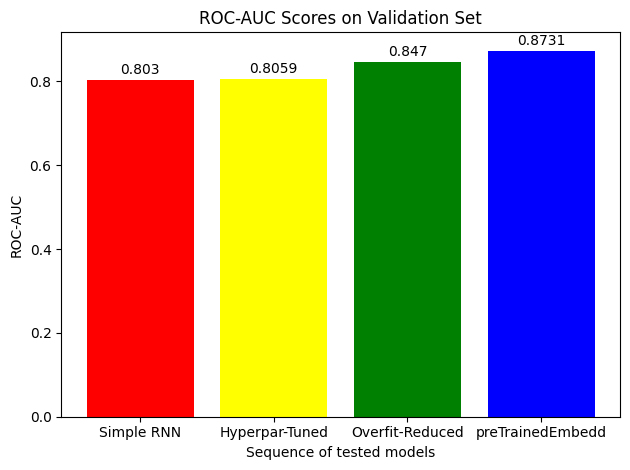

In [47]:
import matplotlib.pyplot as plt

# Define the variables and their corresponding values
variables = ['Simple RNN', 'Hyperpar-Tuned', 'Overfit-Reduced', 'preTrainedEmbedd']
roc_auc_rnn_model = 0.8030
roc_auc_best_model = 0.8059
roc_auc_new = 0.8470
roc_auc_pretrained = 0.8731

values = [roc_auc_rnn_model, roc_auc_best_model, roc_auc_new, roc_auc_pretrained]

# Define the colors for each bar
colors = ['red', 'yellow', 'green', 'blue']

# Create the bar chart
bars = plt.bar(variables, values, color=colors)

# Add the numerical value on top of each bar
plt.bar_label(bars, padding=2)

# Add a general title for the plot
plt.title('ROC-AUC Scores on Validation Set')

# Add labels for the axes (optional)
plt.xlabel('Sequence of tested models')
plt.ylabel('ROC-AUC')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Save or display the plot
plt.savefig('bar_chart.png')

# **END OF THIS NOTEBOOK fbcv0-0**

APPENDIX: SUBMISSION TO KAGGLE COMPETITION:

To submit your predictions to the NLP with Disaster Tweets competition, I need to follow a specific format and upload process. Since I have already built my RNN model, here is the step-by-step guide to generating my file and submitting it.

Preparation of my Submission File

Kaggle requires a .csv file with exactly two columns: id and target. The id must match the IDs in the test.csv file.

Thus in this notebook, I have to run a block of code similar to this:


Make the Submission on Kaggle

There are two ways to do this:
Option A: From within a Kaggle Notebook (Easiest)

    Click the "Save Version" button in the top right of your Kaggle editor.

    Select "Save & Run All (Commit)".

    Once the run is complete, click the version number (e.g., "Version 1") to open the viewer.

    Scroll down to the Output section on the right sidebar.

    Find submission.csv and click the Submit button next to it.

Option B: Manual Upload

    Go to the Competition Page.

    Click the Submit Predictions button (usually blue, in the top right).

    Upload the submission.csv file you downloaded from your local environment.

    Add a brief description (e.g., "RNN model with LSTM layers") and click Submit.

3. Verify Your Rank

After you click submit, Kaggle will take a few seconds to score your file.

    A success message will appear with your score (accuracy).

    Click "View Leaderboard" to see where you stand.

    Don't forget: As we discussed in the previous step, this is when you should take the screenshot of your position for your GitHub report!

In [49]:
# 1. Load the test file
# test_df = pd.read_csv('test.csv')

test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UniversityColorado_MachineLearning/Course#3_DeepLearning/Module#4_SequentialData/data/test.csv')


# 2. Extract the text
X_test_raw = test_df['text']

# 3. IMPORTANT: Use the SAME tokenizer you used for training
# Do NOT call fit_on_texts again, only transform/sequence it!
# X_test_sequences = tokenizer.texts_to_sequences(X_test_raw)
# X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# 4. Predict
predictions = model_with_pretrained_embeddings.predict(X_test_padded)

# 5. Format for Kaggle (id and target)
submission = pd.DataFrame({
    'id': test_df['id'],
    'target': (predictions > 0.5).astype(int).flatten()
})

# 6. Save the file to Colab
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/UniversityColorado_MachineLearning/Course#3_DeepLearning/Module#4_SequentialData/data/my_submission.csv', index=False)

#/content/drive/MyDrive/Colab Notebooks/UniversityColorado_MachineLearning/Course#3_DeepLearning/Module#4_SequentialData/data/test.csv')



102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


Let's verify whether the file my_submission.csv looks of...

1. The Verification Checklist

Run this small block of code in a new cell in your Colab notebook to inspect the file:

In [50]:
import pandas as pd

# Load your new submission file
check_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UniversityColorado_MachineLearning/Course#3_DeepLearning/Module#4_SequentialData/data/my_submission.csv')

# Check 1: Display the first 5 rows
print("--- Header Preview ---")
print(check_sub.head())

# Check 2: Verify the shape (Must have 3263 rows and 2 columns)
print("\n--- File Shape ---")
print(f"Rows: {check_sub.shape[0]}, Columns: {check_sub.shape[1]}")

# Check 3: Ensure columns are named exactly 'id' and 'target'
print("\n--- Column Names ---")
print(check_sub.columns.tolist())

--- Header Preview ---
   id  target
0   0       1
1   2       1
2   3       1
3   9       1
4  11       1

--- File Shape ---
Rows: 3263, Columns: 2

--- Column Names ---
['id', 'target']


It is acceptable if:

    The columns are exactly id and target (case-sensitive).

    The target column contains only 0 and 1.

    It has 3263 rows (excluding the header).

BUT!!!! in column target I have only 1 (no zeros 0) !!!!!

If my target column has only 1s and no 0s, we have a small problem. This means my model thinks every single tweet in the test set is a disaster. HORROR!!!!

While Kaggle will technically "accept" the file, my score will be very low because about 57% of the test tweets are actually non-disasters (0s). This usually happens because of how the model's output is being converted into integers.
Why is this happening?

In a binary RNN model, the final layer usually uses a Sigmoid activation function. This outputs a probability between 0 and 1 (e.g., 0.12, 0.85, 0.44).

If I just use .astype(int) on these raw probabilities, Python rounds everything down to 0—unless the model is outputting values like 1.000002, which shouldn't happen with Sigmoid.

**How to Fix It**

I need to apply a threshold (usually 0.5) to decide what is a 0 and what is a 1. I will try running this specific code block to overwrite my submission file:

In [51]:
# Assuming 'predictions' is the output from your model.predict() call
# This will force values above 0.5 to be 1, and everything else to be 0
binary_predictions = (predictions > 0.5).astype(int).flatten()

# Re-create the submission dataframe
submission = pd.DataFrame({
    'id': test_df['id'],
    'target': binary_predictions
})

# Save it again
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/UniversityColorado_MachineLearning/Course#3_DeepLearning/Module#4_SequentialData/data/my_submission.csv', index=False)

# Check the counts - you SHOULD see both 0 and 1 now
print(submission['target'].value_counts())

target
0    2151
1    1112
Name: count, dtype: int64


value_counts output show ...target: 0 are 2151 and 1 are 1112 BIEEEEN!!!!

That is exactly what I want to see! Those numbers look very realistic for this dataset—it shows your model is actually distinguishing between the two classes rather than just guessing the same thing for everything.

Now I'm ready to cross the finish line.


Step 1: Final Submission

    Download that updated my_submission.csv from your Colab files.

    Go to the Kaggle Submission Page.

    Upload the file and submit.

    Note your score: Kaggle will give you a "Public Score" (Accuracy).

Step 2: Get your Leaderboard Screenshot

    Click on the Leaderboard tab in the competition.

    In the search box, type your Kaggle Username.

    Once it finds you, take a screenshot that shows your Rank, Username, and Score.

        Tip: This is great evidence for your GitHub repo to prove your model actually works!

Step 3: Final GitHub Sync

Since you've made these changes (fixing the threshold), make sure your GitHub version is the "final-final" version:

    In Colab, go to File > Save.

    Go to your GitHub repository.

    Click Add file > Upload files and upload this final version of your .ipynb. It will overwrite the old one so your URL stays the same.

Following this submission to Kaggel competition I update this notebook on the top according to the public assessment from Kaggle Competition: Rank #272 Kaggel Public Score: 0.80079.

Comment received...

**Actually, a score of 0.80079 is fantastic for a first-time NLP project! In this specific Kaggle competition, breaking the 80% mark means your RNN is effectively capturing the nuances of the language. Many people get stuck in the 70s, so you should be very proud of that rank—especially at #272.**
**bold text**

**All done! Happy Days!**